<a href="https://colab.research.google.com/github/AmruthaAN/Amrutha-ml-project/blob/main/used_device_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Used Device Price Prediction**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df=pd.read_csv('/content/used_device_data.csv')

In [58]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [59]:
df.tail()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [60]:
df.shape

(3454, 15)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [62]:
df.isna().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

### **count plot**



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


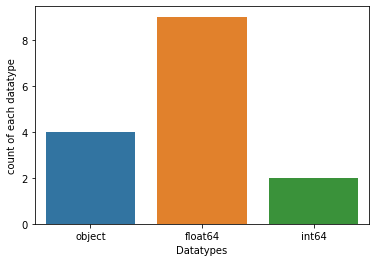

In [65]:
sns.countplot(df.dtypes,data=df)
plt.xlabel("Datatypes")
plt.ylabel("count of each datatype")
plt.show()

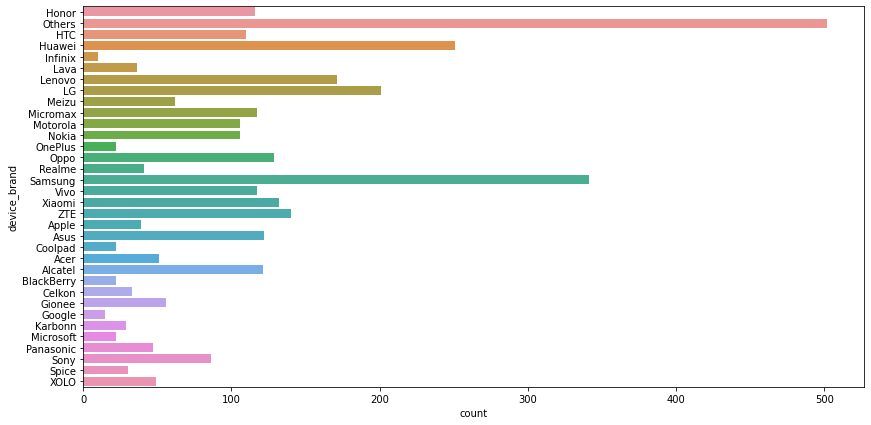

In [66]:
plt.figure(figsize=(14,7))
sns.countplot(y='device_brand',data=df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


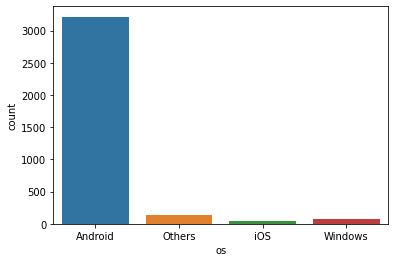

In [67]:
sns.countplot('os',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


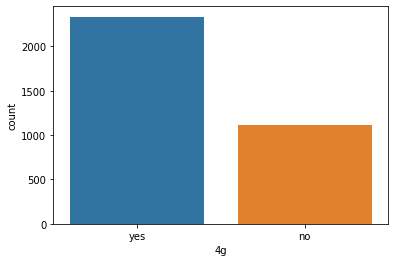

In [68]:
sns.countplot('4g',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


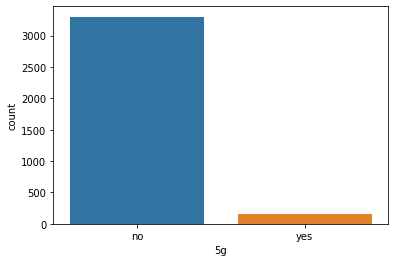

In [69]:
sns.countplot('5g',data=df)

### **histogram**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7286f0cdc0>,
      dtype=object)

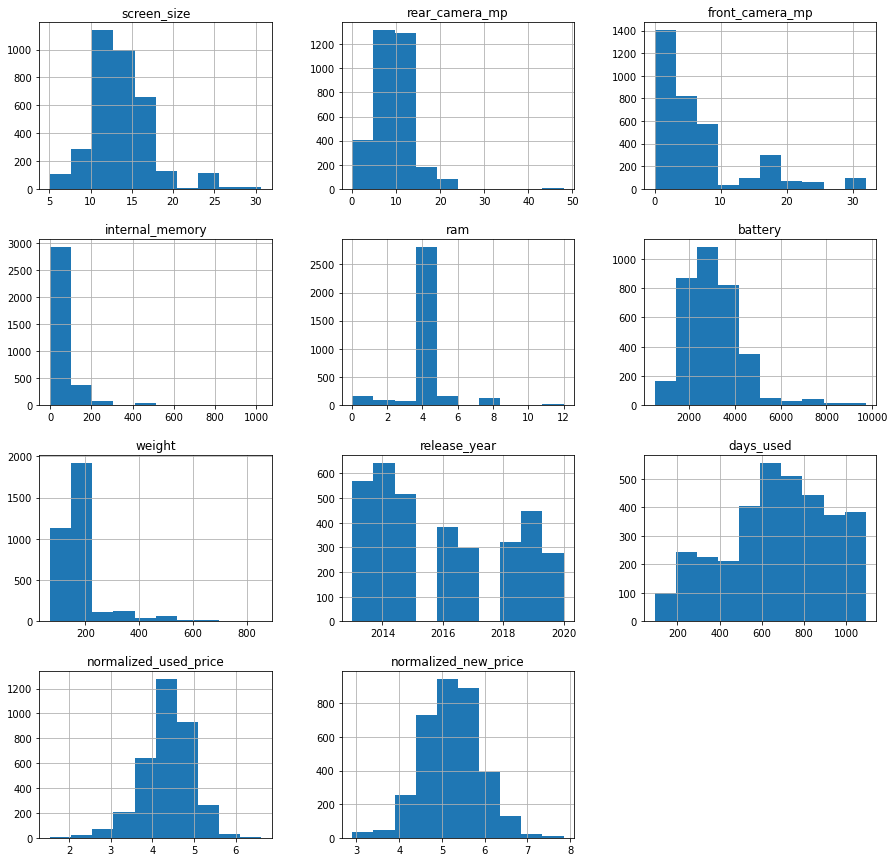

In [70]:
df.hist(figsize=(15,15))

### **correlation**

In [71]:
df.corr()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,0.364223,-0.291723,0.614785,0.460889
rear_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,0.353728,-0.144672,0.587302,0.541655
front_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,0.690942,-0.552636,0.608074,0.475479
internal_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,0.235429,-0.242712,0.190993,0.195992
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,0.314203,-0.280066,0.520289,0.532056
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,0.488660,-0.370895,0.613619,0.470754
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,0.071290,-0.067470,0.382354,0.269540
release_year,0.364223,0.353728,0.690942,0.235429,0.314203,0.488660,0.071290,1.000000,-0.750390,0.509790,0.303689
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,-0.750390,1.000000,-0.358264,-0.216625
normalized_used_price,0.614785,0.587302,0.608074,0.190993,0.520289,0.613619,0.382354,0.509790,-0.358264,1.000000,0.834496


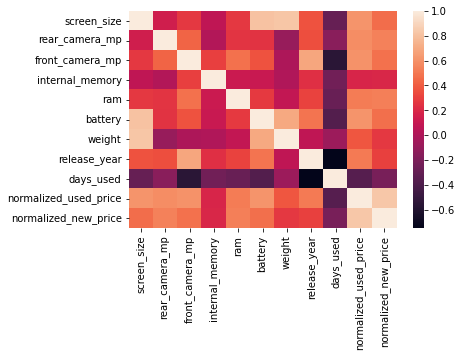

In [72]:
sns.heatmap(df.corr())

### **Regression Plot**

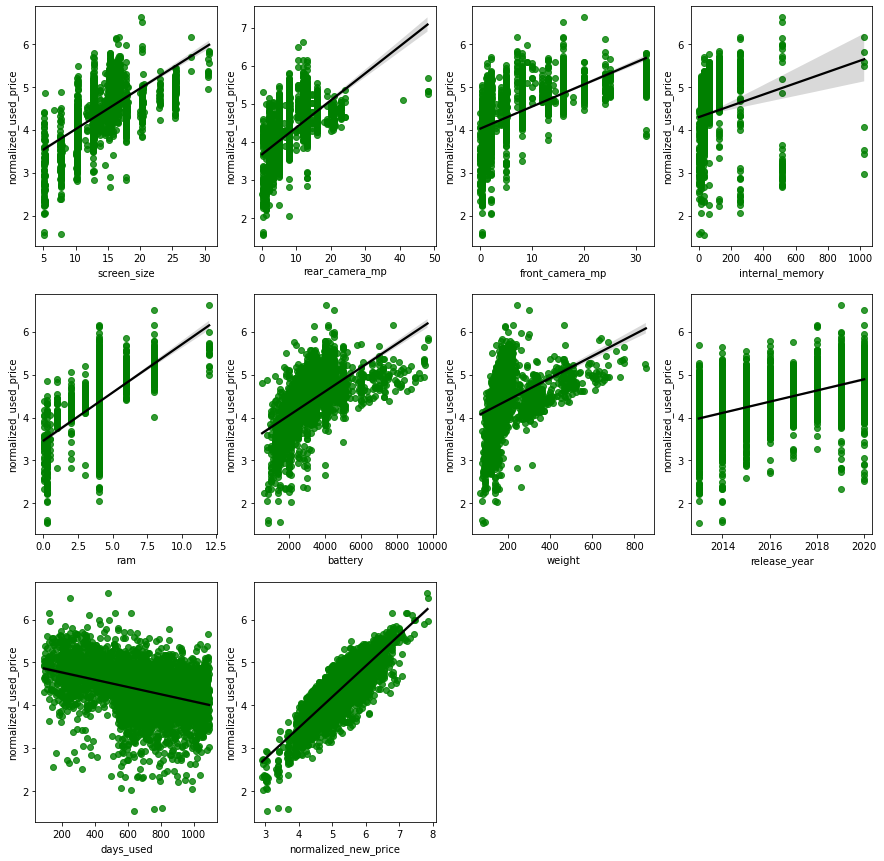

In [88]:
num_features=[i for i in df.columns if df[i].dtype!='O' and i!='normalized_used_price']
plt.figure(figsize=(15,15))
for i in enumerate(num_features):
  plt.subplot(3,4,i[0]+1)
  sns.regplot(x=i[1],y='normalized_used_price',data=df,color='black',scatter_kws={"color":"green"})

### Data Preprocessing

In [ ]:
dummy=pd.get_dummies(df[['device_brand','os','4g','5g']],drop_first=True)
dummy

,device_brand_Alcatel,device_brand_Apple,device_brand_Asus,device_brand_BlackBerry,device_brand_Celkon,device_brand_Coolpad,device_brand_Gionee,device_brand_Google,device_brand_HTC,device_brand_Honor,...,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3450,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3451,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3452,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
dfe=pd.concat([df,dummy],axis=1)
dfe

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,...,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,...,0,0,0,0,0,0,0,0,1,0
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,...,0,0,0,0,0,0,0,0,1,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,...,0,0,0,0,0,0,0,0,1,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,...,0,0,0,0,0,0,0,0,1,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,...,0,0,0,0,0,0,0,0,1,0
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,...,0,0,0,0,0,0,0,0,1,0
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,...,0,0,0,0,0,0,0,0,1,0
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
dfe=dfe.drop(['device_brand','os','4g','5g'],axis=1)
dfe

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,...,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,15.34,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,...,0,0,0,0,0,0,0,0,1,0
3450,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,...,0,0,0,0,0,0,0,0,1,0
3451,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,...,0,0,0,0,0,0,0,0,1,0
3452,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
dfe['rear_camera_mp']=dfe['rear_camera_mp'].fillna(dfe['rear_camera_mp'].median())
dfe['front_camera_mp']=dfe['front_camera_mp'].fillna(dfe['front_camera_mp'].median())
dfe['internal_memory']=dfe['internal_memory'].fillna(dfe['internal_memory'].median())
dfe['ram']=dfe['ram'].fillna(dfe['ram'].median())
dfe['battery']=dfe['battery'].fillna(dfe['battery'].median())
dfe['weight']=dfe['weight'].fillna(dfe['weight'].median())

In [ ]:
dfe.isna().sum()

screen_size                0
rear_camera_mp             0
front_camera_mp            0
internal_memory            0
ram                        0
battery                    0
weight                     0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
device_brand_Alcatel       0
device_brand_Apple         0
device_brand_Asus          0
device_brand_BlackBerry    0
device_brand_Celkon        0
device_brand_Coolpad       0
device_brand_Gionee        0
device_brand_Google        0
device_brand_HTC           0
device_brand_Honor         0
device_brand_Huawei        0
device_brand_Infinix       0
device_brand_Karbonn       0
device_brand_LG            0
device_brand_Lava          0
device_brand_Lenovo        0
device_brand_Meizu         0
device_brand_Micromax      0
device_brand_Microsoft     0
device_brand_Motorola      0
device_brand_Nokia         0
device_brand_OnePlus       0
device_brand_Oppo          0
device_brand_O

In [74]:
x=dfe.drop(['normalized_used_price'],axis=1)
x

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_new_price,...,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,15.34,8.0,8.0,64.0,6.0,5000.0,190.0,2019,232,6.483872,...,0,0,0,0,0,0,0,0,1,0
3450,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,6.251538,...,0,0,0,0,0,0,0,0,1,0
3451,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.528829,...,0,0,0,0,0,0,0,0,1,0
3452,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.624188,...,0,0,0,0,0,0,0,0,1,0


In [76]:
y=dfe['normalized_used_price']
y

0       4.307572
1       5.162097
2       5.111084
3       5.135387
4       4.389995
          ...   
3449    4.492337
3450    5.037732
3451    4.357350
3452    4.349762
3453    4.132122
Name: normalized_used_price, Length: 3454, dtype: float64

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train
x_test
y_train
y_test

511     3.974246
51      5.001191
1171    4.562054
2282    4.176232
557     3.156149
          ...   
1839    4.019980
104     2.386926
2573    4.134847
2741    4.365008
3294    4.944068
Name: normalized_used_price, Length: 1037, dtype: float64

### **Multiple linear regression**

In [78]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
y_pred_lr

array([3.87367318, 4.92735518, 4.32173646, ..., 4.14627557, 4.60995652,
       4.65262286])

In [79]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [80]:
print("mean absolute error:",mean_absolute_error(y_pred_lr,y_test))
print("mean absolute percentage error:",mean_absolute_percentage_error(y_pred_lr,y_test))
print("mean squared error:",mean_squared_error(y_pred_lr,y_test))
mse=mean_squared_error(y_pred_lr,y_test)
print("root squared error:",np.sqrt(mse))
print("r2 score:",r2_score(y_pred_lr,y_test))

mean absolute error: 0.18831240342328326
mean absolute percentage error: 0.04419922134455647
mean squared error: 0.0567553776318504
root squared error: 0.23823387171401636
r2 score: 0.7991969645475008


### **Decision Tree**

In [83]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
y_pred_dt

array([4.01385731, 4.70582967, 4.37121844, ..., 4.263806  , 4.4743779 ,
       4.6220273 ])

In [84]:
print("mean absolute error:",mean_absolute_error(y_pred_dt,y_test))
print("mean absolute percentage error:",mean_absolute_percentage_error(y_pred_dt,y_test))
print("mean squared error:",mean_squared_error(y_pred_dt,y_test))
mse=mean_squared_error(y_pred_dt,y_test)
print("root squared error:",np.sqrt(mse))
print("r2 score:",r2_score(y_pred_dt,y_test))

mean absolute error: 0.2424396718698168
mean absolute percentage error: 0.05703482567704357
mean squared error: 0.0993870950360953
root squared error: 0.31525718871438174
r2 score: 0.70737110404473


### **Random Forest**

In [85]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([3.99432218, 4.81968733, 4.30416753, ..., 4.14794891, 4.45752851,
       4.71473615])

In [86]:
print("mean absolute error:",mean_absolute_error(y_pred_rf,y_test))
print("mean absolute percentage error:",mean_absolute_percentage_error(y_pred_rf,y_test))
print("mean squared error:",mean_squared_error(y_pred_rf,y_test))
mse=mean_squared_error(y_pred_rf,y_test)
print("root squared error:",np.sqrt(mse))
print("r2 score:",r2_score(y_pred_rf,y_test))

mean absolute error: 0.17926439731759877
mean absolute percentage error: 0.041865228522568555
mean squared error: 0.05003212572913643
root squared error: 0.223678621529051
r2 score: 0.8218835764803034
